In [ ]:
# Install TensorFlow
pip install tensorflow

In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

2024-02-16 14:57:34.174866: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Create DataFrame from CSV
df = pd.read_csv('/Users/noah/Desktop/Border Crossing Project/CSV/cleaned_border_data.csv')

In [3]:
# Show first 5 rows
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Datetime
0,International Falls,Minnesota,3604,US-Canada Border,Oct 2023,Trucks,1372,48.608,-93.401,2023-10
1,Sumas,Washington,3009,US-Canada Border,Oct 2023,Train Passengers,57,49.002,-122.265,2023-10
2,Naco,Arizona,2603,US-Mexico Border,Sep 2023,Trucks,270,31.334,-109.948,2023-09
3,Wildhorse,Montana,3323,US-Canada Border,Sep 2023,Trucks,42,48.999,-110.215,2023-09
4,Calais,Maine,115,US-Canada Border,Sep 2023,Trains,15,45.189,-67.275,2023-09


In [4]:
# Dropping the Date column as it is repetitive
df = df.drop('Date', axis = 1)

In [5]:
# Create a new DataFrame with dummies for categorical columns
transformed_df = pd.get_dummies(df, columns = ['Port Name','State', 'Border', 'Measure', 'Datetime'],drop_first = True)

In [6]:
# Show first 5 rows
transformed_df.head()

,Port Code,Value,Latitude,Longitude,Port Name_Alexandria Bay,Port Name_Algonac,Port Name_Ambrose,Port Name_Anacortes,Port Name_Andrade,Port Name_Antler,...,Datetime_2023-03,Datetime_2023-04,Datetime_2023-05,Datetime_2023-06,Datetime_2023-07,Datetime_2023-08,Datetime_2023-09,Datetime_2023-10,Datetime_2023-11,Datetime_2023-12
0,3604,1372,48.608,-93.401,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3009,57,49.002,-122.265,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2603,270,31.334,-109.948,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3323,42,48.999,-110.215,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,115,15,45.189,-67.275,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# Created X and Y features for machine learning model
X = transformed_df.drop('Value',axis = 1 )
y = transformed_df['Value']

# Train, Test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,train_size = 0.7 , random_state = 42)

In [8]:
# Preprocessing and normalizing the values for the model
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()

X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

In [9]:
# Import libraries for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU ,PReLU , LeakyReLU , ELU 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping])


Epoch 1/100
8506/8506 [==============================] - 35s 4ms/step - loss: 3799714048.0000 - val_loss: 2048547200.0000
Epoch 2/100
8506/8506 [==============================] - 35s 4ms/step - loss: 1650963968.0000 - val_loss: 1524429440.0000
Epoch 3/100
8506/8506 [==============================] - 33s 4ms/step - loss: 1398036864.0000 - val_loss: 1535272576.0000
Epoch 4/100
8506/8506 [==============================] - 33s 4ms/step - loss: 1187469312.0000 - val_loss: 1104352256.0000
Epoch 5/100
8506/8506 [==============================] - 35s 4ms/step - loss: 979396288.0000 - val_loss: 1209428224.0000
Epoch 6/100
8506/8506 [==============================] - 41s 5ms/step - loss: 865225792.0000 - val_loss: 1151607808.0000
Epoch 7/100
8506/8506 [==============================] - 35s 4ms/step - loss: 719651328.0000 - val_loss: 852062144.0000
Epoch 8/100
8506/8506 [==============================] - 36s 4ms/step - loss: 629905088.0000 - val_loss: 903943744.0000
Epoch 9/100
8506/8506 [=======

In [11]:
# Create a summary of the model for understanding
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               95800     
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 149121 (582.50 KB)
Trainable params: 14912

In [13]:
# Use the trained model to make predictions based on independent features X_test
y_pred = model.predict(X_test)

3646/3646 [==============================] - 5s 1ms/step


In [14]:
# Altering the y_test data into a 2D array with one column
y_test = [[item] for item in y_test]
y_test = np.reshape(y_test , (-1,1))

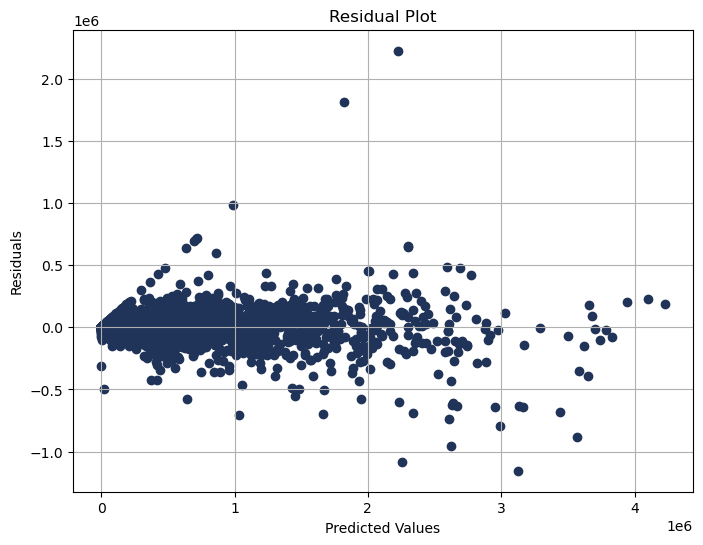

In [16]:
# Create Residual Plot to visualize insights about the model
res = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred , res ,color = '#203358')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [17]:
# Function to calculate the R-Squared value
def r_squared(y_test, y_pred):
    """
    Calculate the coefficient of determination (R-squared).
    
    Parameters:
    y_test : Panda Series or Array, True values for Y.
    y_pred : Pandas Series or Array, Predicted values for Y.

    Returns:
    float
        R-squared value.
    """
    y_test_mean = np.mean(y_test)
    SS_total = np.sum((y_test - y_test_mean)**2)
    SS_residual = np.sum((y_test - y_pred)**2)
    r_squared = 1 - (SS_residual / SS_total)
    return r_squared

In [18]:
# Print R-Squared for model prediction
print("R-squared:", r_squared(y_test, y_pred))

R-squared: 0.9787894389337604


The R-Squared is very high meaning the model is very accurate. The model predicts values with a 97.8% accuracy.